## Описание задачи

Эти данные связаны с прямыми маркетинговыми кампаниями некоторого португальского банка. Маркетинговые кампании были основаны на телефонных звонках. Часто требовалось более одного контакта с одним и тем же клиентом, чтобы получить доступ к тому, будет ли продукт (банковский срочный депозит) ("да") или нет ("нет") подписан.
Цель классификации состоит в том, чтобы предсказать, подпишется ли клиент на срочный депозит.

## 1. Загрузка данных

In [1]:
import numpy as np              # Массивы (матрицы, векторы, линейная алгебра)
import matplotlib.pyplot as plt # Научная графика
%matplotlib inline 
    # Говорим jupyter'у, чтобы весь графический вывод был в браузере, а не в отдельном окне
import pandas as pd             # Таблицы и временные ряды (dataframe, series)
import seaborn as sns           # Еще больше красивой графики для визуализации данных
import sklearn                  # Алгоритмы машинного обучения

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/shekotilova-yuliya/machine-learning/main/BankCustomerData.csv')

In [3]:
data.shape

(42639, 17)

In [4]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,term_deposit
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [5]:
data.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,term_deposit
42634,21,student,single,secondary,no,2488,no,no,telephone,12,jan,661,2,92,1,success,yes
42635,87,retired,married,primary,no,2190,no,no,telephone,12,jan,512,2,-1,0,unknown,yes
42636,34,blue-collar,married,primary,no,6718,no,no,cellular,13,jan,278,4,97,1,other,no
42637,22,student,single,secondary,no,254,no,no,cellular,13,jan,143,2,-1,0,unknown,yes
42638,32,management,single,tertiary,no,1962,no,no,cellular,13,jan,130,1,-1,0,unknown,no


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42639 entries, 0 to 42638
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   age           42639 non-null  int64 
 1   job           42639 non-null  object
 2   marital       42639 non-null  object
 3   education     42639 non-null  object
 4   default       42639 non-null  object
 5   balance       42639 non-null  int64 
 6   housing       42639 non-null  object
 7   loan          42639 non-null  object
 8   contact       42639 non-null  object
 9   day           42639 non-null  int64 
 10  month         42639 non-null  object
 11  duration      42639 non-null  int64 
 12  campaign      42639 non-null  int64 
 13  pdays         42639 non-null  int64 
 14  previous      42639 non-null  int64 
 15  poutcome      42639 non-null  object
 16  term_deposit  42639 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.5+ MB


Итак, таблица содержит данные о 42639 клиентах банка и контакте с ними. Всего имеется 17 признаков:
- age          - возраст (числовой)
- job          - тип занятости (категориальный: администратор, рабочая сила, предпрениматель, домохозяйка, менеджмент, пенсионер, самозанятый, сфера услуг, студент, тех. специалист, безработный, 'unknown')
- marital      - семейное положение (категориальный: в разводе, (не) в браке, один, 'unknown')
- education    - образование (категориальный: старшая школа, без образования, проф. курсы, бакалавр/магистр, 'unknown')
- default      - есть ли задолженность на кредитной карте (категориальный: нет, да, 'unknown')
- balance      - баланс клинта (числовой)
- housing      - есть ли ипотечный кредит(категориальный: нет, да, 'unknown')
- loan         - есть ли кредит на личные цели (категориальный: нет, да, 'unknown')
- contact      - куда был произведён рекламный звонок (категориальный: сотовый телефон, телефон)
- day          - день, когда поступил звонок (числовой)
- month        - месяц, когда поступил звонок (категориальный: январь, февраль, ..., декабрь)
- duration     - длительность звонка (числовой) (Примечание: данный признак имеет прямое влияние на цель предсказания, нулевые по длительности разговоры автоматически означают отказ. При обучении модели его необходимо отбросить. )
- campaign     - число звонков данному клиенту в рамках текущей рекламной кампании (числовой)
- pdays        - число дней со звонка по прошлой рекламной кампании (-1 если звонка по ней не было)  (числовой)
- previous     - число звонков данному клиенту в рамках прошлой рекламной кампании (числовой)
- poutcome     - результат прошлой рекламной кампании (категориальный: неудача, успех, 'unknown')
- term_deposit - согласился ли клиент на срочный депозит? (бинарный: да/нет)

In [7]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'term_deposit'],
      dtype='object')

Преобразуем тип соответствующих категориальных признаков в подходящий и рассмотрим индексы каждой категории:
Некоторые столбцы содержат категориальные значения. Пока они имеют тип 'object'. Заменим тип на специальный, предназначенный для хранения категориальных значений:

In [8]:
data['job'] = data['job'].astype('category')
data['marital'] = data['marital'].astype('category')
data['education'] = data['education'].astype('category')
data['default'] = data['default'].astype('category')
data['housing'] = data['housing'].astype('category')
data['loan'] = data['loan'].astype('category')
data['contact'] = data['contact'].astype('category')
data['month'] = data['month'].astype('category')
data['poutcome'] = data['poutcome'].astype('category')
data['term_deposit'] = data['term_deposit'].astype('category')

In [9]:
data['job'].dtype

CategoricalDtype(categories=['admin.', 'blue-collar', 'entrepreneur', 'housemaid',
                  'management', 'retired', 'self-employed', 'services',
                  'student', 'technician', 'unemployed', 'unknown'],
, ordered=False)

In [10]:
data['marital'].dtype

CategoricalDtype(categories=['divorced', 'married', 'single'], ordered=False)

In [11]:
data['education'].dtype

CategoricalDtype(categories=['primary', 'secondary', 'tertiary', 'unknown'], ordered=False)

In [12]:
data['default'].dtype

CategoricalDtype(categories=['no', 'yes'], ordered=False)

In [13]:
data['housing'].dtype

CategoricalDtype(categories=['no', 'yes'], ordered=False)

In [14]:
data['loan'].dtype

CategoricalDtype(categories=['no', 'yes'], ordered=False)

In [15]:
data['contact'].dtype

CategoricalDtype(categories=['cellular', 'telephone', 'unknown'], ordered=False)

In [16]:
data['month'].dtype

CategoricalDtype(categories=['apr', 'aug', 'dec', 'feb', 'jan', 'jul', 'jun', 'mar',
                  'may', 'nov', 'oct', 'sep'],
, ordered=False)

In [17]:
data['poutcome'].dtype

CategoricalDtype(categories=['failure', 'other', 'success', 'unknown'], ordered=False)

In [18]:
data['term_deposit'].dtype

CategoricalDtype(categories=['no', 'yes'], ordered=False)

## 2. Обработка выбросов

Из всех числовых признаков только возраст и баланс счёта могут обладать выбросами. Поэтому построим диаграмму рассеивания для признаков 'age' и 'balance':

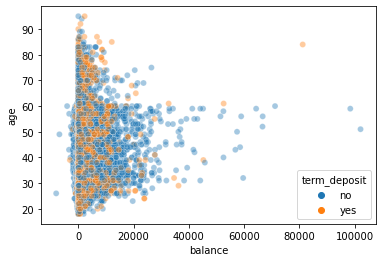

In [19]:
sns.scatterplot(x = 'balance', y ='age', hue='term_deposit', alpha=0.4, data = data)
pass

Видим, что выбросы есть для баланса. Поэтому удалим все строки таблицы, в которых данные 'balance' выходят за пределы квантилей $0.005$, $0.995$ и построим диаграмму рассеивания заново:

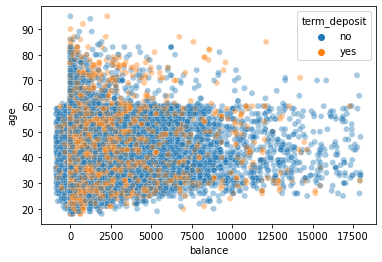

In [20]:
rows_to_drop = data[
    (data['balance'] < data['balance'].quantile(0.005)) | (data['balance'] > data['balance'].quantile(0.995))].index
data = data.drop(rows_to_drop)
data.shape
sns.scatterplot(x = 'balance', y ='age', hue='term_deposit', alpha=0.4,data = data)
pass

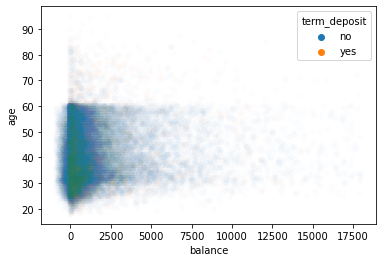

In [21]:
sns.scatterplot(x = 'balance',y ='age',hue='term_deposit',alpha=0.01,data = data)
pass

Какой-либо зависимости между возрастом и балансом на счёте проследить не удаётся, хотя поначалу кажется что у людей 60 лет и старше в среднем меньше денег на счёте, но на самом деле им звонили в целом намного реже, что видно на прозрачной диаграмме.

Также можно заметить, что ни у одного клиента старше 60 лет нет отрицательного баланса на счёте.

## 3. Визуализация данных и вычисление основных характеристик

Получим общую информацию о числовых признаках:

In [22]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,42211.000000,42211.000000,42211.000000,42211.000000,42211.000000,42211.000000,42211.000000
mean,40.756912,1209.564118,15.844993,256.126555,2.816114,34.274597,0.467272
std,10.194448,2145.691083,8.293101,258.635801,3.164250,92.127989,2.174008
min,18.000000,-876.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,66.000000,8.000000,101.000000,1.000000,-1.000000,0.000000
50%,39.000000,429.000000,16.000000,177.000000,2.000000,-1.000000,0.000000
75%,48.000000,1364.000000,21.000000,315.000000,3.000000,-1.000000,0.000000
max,95.000000,17957.000000,31.000000,4918.000000,63.000000,536.000000,275.000000


Для каждого количественного признака приведены средние значения, стандартное отклонение, минимальное и макимальное значения, медиана и значения квартилей.

А теперь посмотрим на данные о категориальных признаках:

In [23]:
data.describe(include=['category'])

,job,marital,education,default,housing,loan,contact,month,poutcome,term_deposit
count,42211,42211,42211,42211,42211,42211,42211,42211,42211,42211
unique,12,3,4,2,2,2,3,12,4,2
top,blue-collar,married,secondary,no,yes,no,cellular,may,unknown,no
freq,9494,25581,21891,41463,24329,35229,26958,13406,35702,38286


Можем увидеть, что формально пропущенных значений, кроме 'unknown' в некоторых категориальных признаках, нет. Также можем увидеть несколько обобщающих признаков (например, средний возраст клиентов, самый часто встречающийся тип занятости и образования). Построим матрицу корреляции для числовых признаков:

In [24]:
corr_mat = data.corr()
data.corr()

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.090582,-0.009506,-0.016050,0.008904,-0.043644,-0.015949
balance,0.090582,1.000000,0.011664,0.024939,-0.018882,-0.005265,0.011352
day,-0.009506,0.011664,1.000000,-0.031155,0.165951,-0.101060,-0.048298
duration,-0.016050,0.024939,-0.031155,1.000000,-0.085332,-0.011045,-0.008314
campaign,0.008904,-0.018882,0.165951,-0.085332,1.000000,-0.080044,-0.024225
pdays,-0.043644,-0.005265,-0.101060,-0.011045,-0.080044,1.000000,0.450179
previous,-0.015949,0.011352,-0.048298,-0.008314,-0.024225,0.450179,1.000000


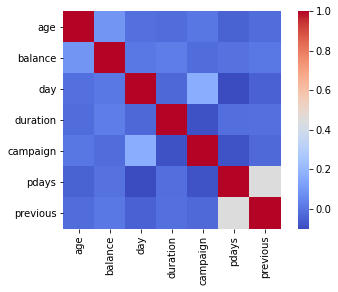

In [25]:
sns.heatmap(corr_mat, square=True, cmap='coolwarm')
pass


Как и предполагалось, никакой заметной корреляции увидеть не удаётся. Разве что между числом звонков в прошлый раз, и числом дней прошедших с прошлого звонка - 0/365 соответственно для многих клиентов. Эта связь была заведомо известна и никакой новой информации не даёт.

No handles with labels found to put in legend.


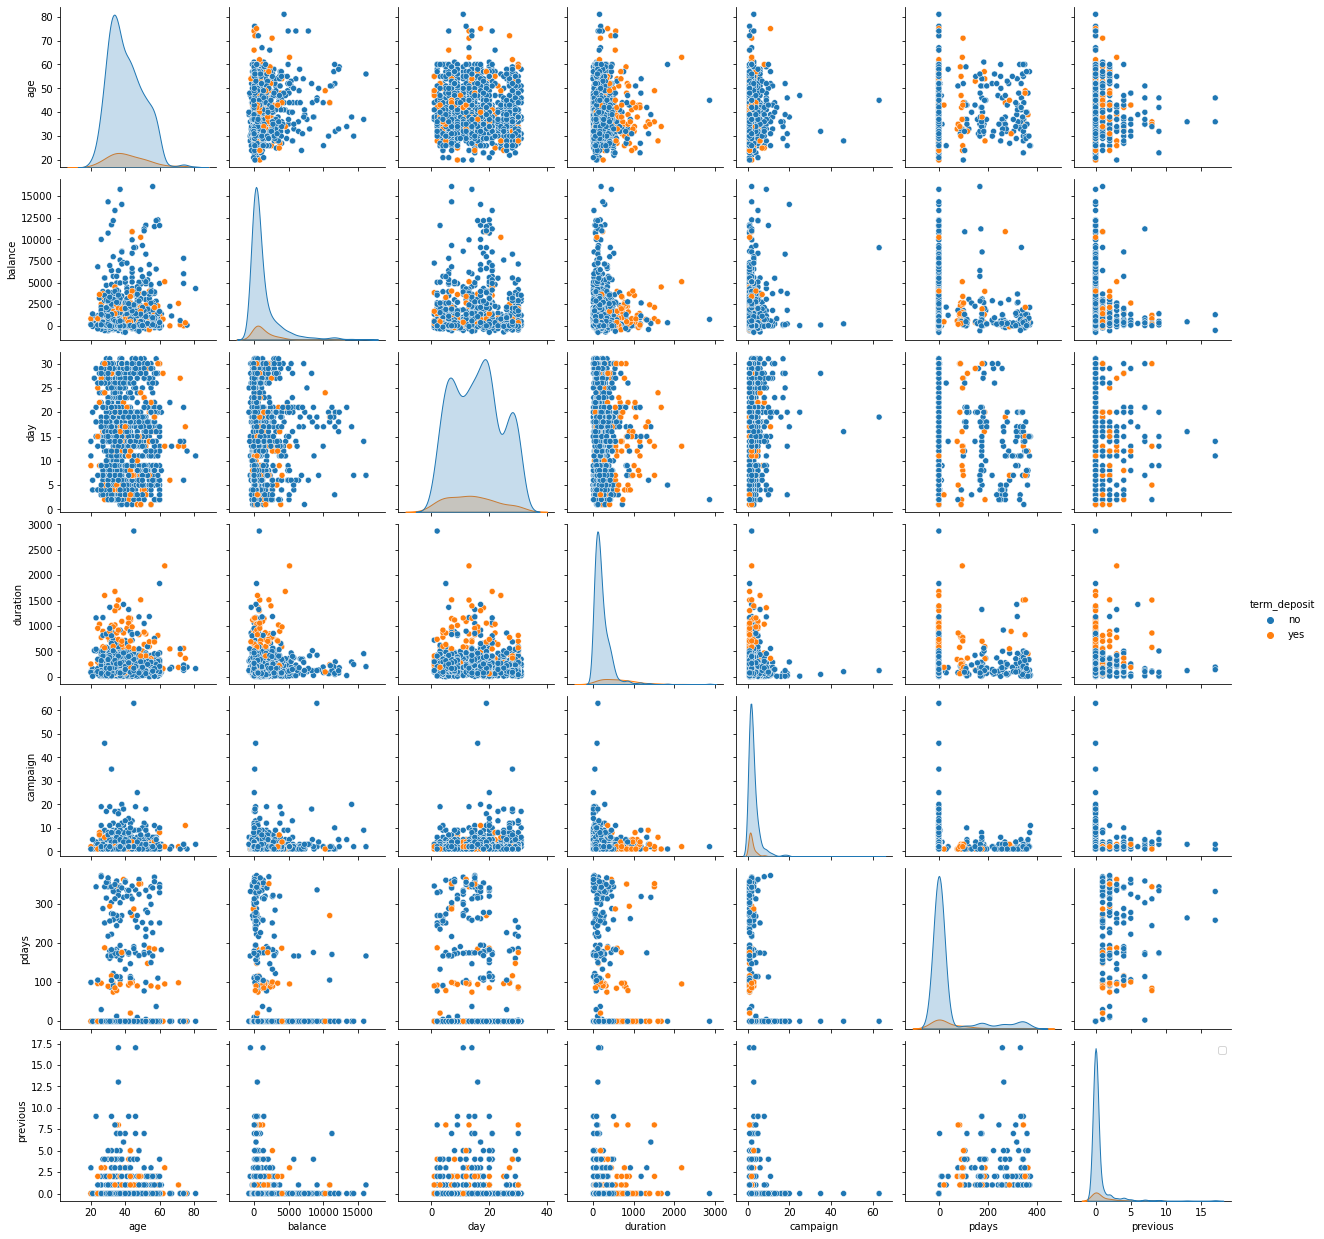

In [26]:
np.random.seed(21)
random_subset = np.random.choice(np.arange(data.shape[0]), size=1000, replace=False)
sns.pairplot(data.iloc[random_subset], diag_kind = 'auto', hue='term_deposit')
plt.legend()
pass

Можем сделать простой вывод, что чем более длительным был звонок, тем чаще результатом было согласие. К сожалению, воспользоваться этим фактом никак нельзя, потому что длительность звонка до его совершения неизвестна. Большинству до этого не звонили ни разу, большинство же и разговаривать не стало. Распределение по дням более-менее равномерное с пиками 10, 20, 30 числа, что интересно. На гистограммы возраста и баланса на счёте, а также на их совместное распределение взглянем внимательнее.

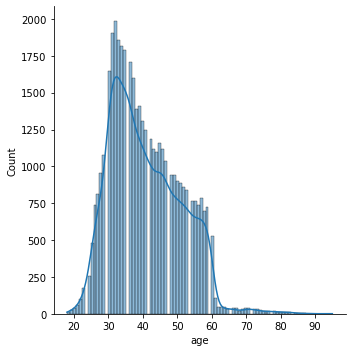

In [27]:
sns.displot(data['age'], kde=True)
pass

На гисторграмме возраста заметны предпочтения банка при обзвоне. Действительно, людям за 60 банк старается не звонить по вопросу вкладов. Также явно виден пик по возрасту, по-видимому предполагается, что люди около 30 более всего заинтересованы во вкладах.

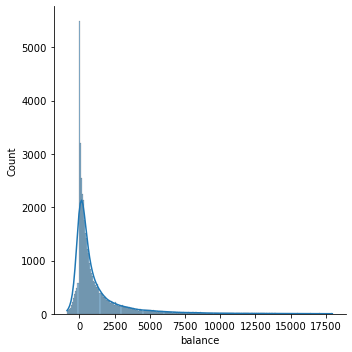

In [28]:
sns.displot(data['balance'],kde=True)
pass

Гистограмма баланса похожа на гамма-распределение по своему виду. Явно выделяется пик - у большинства клиентов, которым звонили, баланс на счёте нулевой.

Теперь посмотрим на статистику связанную с категориальными признаками.

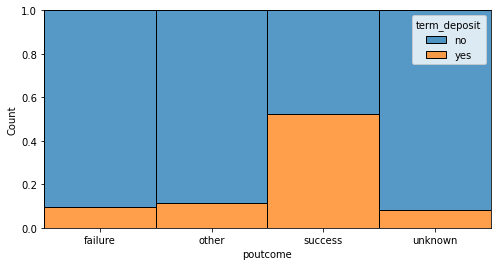

In [29]:
plt.figure(figsize=(8,4))
sns.histplot(x='poutcome',hue='term_deposit', data=data, multiple = 'fill')
pass

На данной гистограмме заметна сильная связь между прошлым согласием и текущим согласием. Второй раз люди делают вклад в 4 раза охотнее.

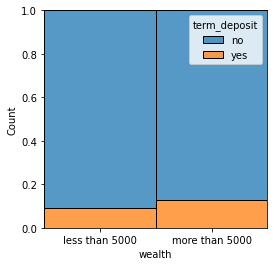

In [30]:
plt.figure(figsize=(4,4))
def wealthy (row):
    if (row['balance'] > 5000):
        return 'more than 5000'
    else:
        return 'less than 5000'
data['wealth'] = data.apply (lambda row: wealthy(row), axis=1)
sns.histplot(x='wealth',hue='term_deposit',data=data,multiple = 'fill')
data = data.drop('wealth',  axis=1)
pass

Люди с большим количеством денег делают больше вкладов, что является вполне интуитивным выводом.

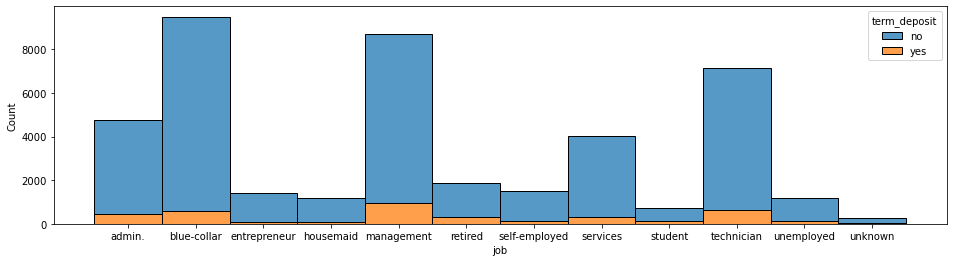

In [31]:
plt.figure(figsize=(16,4))
sns.histplot(x='job',hue='term_deposit',data=data,multiple = 'stack')
pass

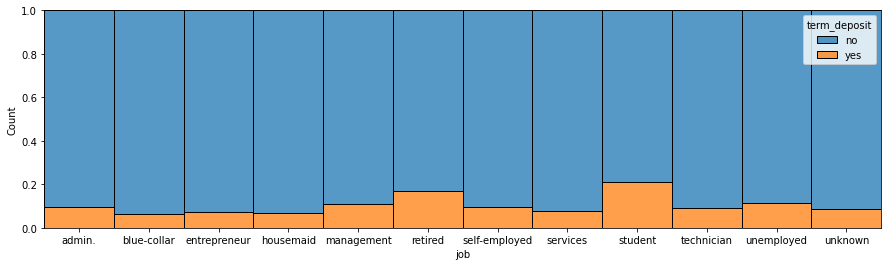

In [32]:
plt.figure(figsize=(15,4))
sns.histplot(x='job',hue='term_deposit',data=data,multiple = 'fill')
pass

По двум гистограммам с зависимостью от типа занятости очевидно, что в банке чаще стараются звонить клиентам занятым на реальной работе, а клиентам с занятостью типа 'предприниматель', 'домохозяйка', 'пенсионер', 'самозанятый', 'студент' звонят в несколько раз реже. В остальном от рода деятельности процент согласия варьируется незначительно.

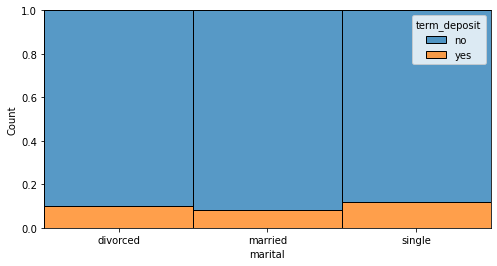

In [33]:
plt.figure(figsize=(8,4))
sns.histplot(x='marital',hue='term_deposit',data=data,multiple = 'fill')
pass

От семейного статуса зависимость незначительная, однако люди в браке всё же согласны делать вклады чуть реже, чем одинокие люди.

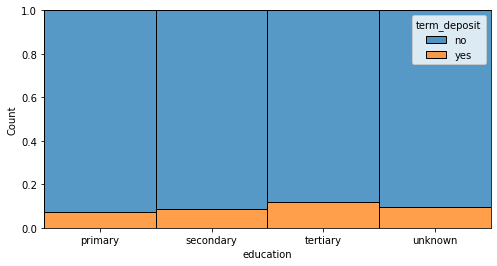

In [34]:
plt.figure(figsize=(8,4))
sns.histplot(x = 'education', hue = 'term_deposit', data = data, multiple = 'fill')
pass

Если смотреть на зависимость от образования то можно сделать вывод о том, что чем выше образование, тем выше процент согласия.

## 4. Обработка пропущенных значений

Посмотрим, сколько пропущенных значений в каждом столбце матрицы:

In [35]:
data.isna().sum()

age             0
job             0
marital         0
education       0
default         0
balance         0
housing         0
loan            0
contact         0
day             0
month           0
duration        0
campaign        0
pdays           0
previous        0
poutcome        0
term_deposit    0
dtype: int64

Заметим, что пусные значеня не найдены. Но в некоторых категориальных признаках (такие, как тип занятости, образование и контакты) есть значения 'unknown'. Будем считать их как пропущенные значения и заменим их на моды, соответствующие им.
Также значение 'unknown' содержит результат прошлой рекламной кампании (признак 'poutcome'). Но в нем с помощью этого значения нужно понимать, что во время предыдущей рекламной кампании с клиентом работы не велось. Поэтому никаких операций с ним производить не будем.

In [36]:
data.replace({'job':'unknown','education':'unknown','contact':'unknown'},{'job':data['job'].mode().iloc[0],'education':data['education'].mode().iloc[0],'contact':data['contact'].mode().iloc[0]}, inplace=True)
for col in ['job', 'education', 'contact']:
    data[col].cat.remove_unused_categories(inplace=True)
data

C:\Users\j-puf\anaconda3\lib\site-packages\pandas\core\arrays\categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,term_deposit
0,58,management,married,tertiary,no,2143,yes,no,cellular,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,cellular,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,cellular,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,secondary,no,1506,yes,no,cellular,5,may,92,1,-1,0,unknown,no
4,33,blue-collar,single,secondary,no,1,no,no,cellular,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42634,21,student,single,secondary,no,2488,no,no,telephone,12,jan,661,2,92,1,success,yes
42635,87,retired,married,primary,no,2190,no,no,telephone,12,jan,512,2,-1,0,unknown,yes
42636,34,blue-collar,married,primary,no,6718,no,no,cellular,13,jan,278,4,97,1,other,no
42637,22,student,single,secondary,no,254,no,no,cellular,13,jan,143,2,-1,0,unknown,yes


## 5. Обработка категориальных признаков

В данном датасете есть несколько признаков, категориями которых являются 'yes'/'no'. Закодируем эти бинарные признаки с помощью числовых.

In [37]:
data['default'] = pd.factorize(data['default'], sort = True)[0]
data['housing'] = pd.factorize(data['housing'],sort = True)[0]
data['loan'] = pd.factorize(data['loan'],sort = True)[0]
data['term_deposit'] = pd.factorize(data['term_deposit'],sort = True)[0]

Оставшиеся категориальные (небинарные) признаки закодируем с помощью метода бинаризации:

In [38]:
job_dummies = pd.get_dummies(data['job'])
job_dummies.head()

,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed
0,0,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,0
2,0,0,1,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,0


In [39]:
marital_dummies = pd.get_dummies(data['marital'])
marital_dummies.head()

,divorced,married,single
0,0,1,0
1,0,0,1
2,0,1,0
3,0,1,0
4,0,0,1


In [40]:
education_dummies = pd.get_dummies(data['education'])
education_dummies.head()

,primary,secondary,tertiary
0,0,0,1
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0


In [41]:
contact_dummies = pd.get_dummies(data['contact'])
contact_dummies.head()

,cellular,telephone
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [42]:
month_dummies = pd.get_dummies(data['month'])
month_dummies.head()

,apr,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
0,0,0,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,0,1,0,0,0


In [43]:
poutcome_dummies = pd.get_dummies(data['poutcome'])
poutcome_dummies.head()

,failure,other,success,unknown
0,0,0,0,1
1,0,0,0,1
2,0,0,0,1
3,0,0,0,1
4,0,0,0,1


Добавим эти dummy-столбцы к таблице и удалим столбцы 'job', 'marital','education', 'contact', 'month', 'poutcome':

In [44]:
data = pd.concat((data, job_dummies), axis=1)
data = data.drop(['job'], axis=1)

In [45]:
data = pd.concat((data, marital_dummies), axis=1)
data = data.drop(['marital'], axis=1)

In [46]:
data = pd.concat((data, education_dummies), axis=1)
data = data.drop(['education'], axis=1)

In [47]:
data = pd.concat((data, contact_dummies), axis=1)
data = data.drop(['contact'], axis=1)

In [48]:
data = pd.concat((data, month_dummies), axis=1)
data = data.drop(['month'], axis=1)

In [49]:
data = pd.concat((data, poutcome_dummies), axis=1)
data = data.drop(['poutcome'], axis=1)

## 6. Нормализация количественных признаков

Перед применением алгоритмов машинного обучения количественные признаки полезно нормализовать.

Наиболее часто используют один из двух следующих способов:

- приведение к отрезку $[0,1]$ - это линейное преобразование, приводящее все значения к заданному отрезку;
- стандартизация - линейное преобразование, приводящее все значения к нулевому среднему и единичному стандартному отклонению.

Выполним стандартизацию всех признаков:

In [50]:
data_stand = (data - data.min(axis=0)) / (data.max(axis=0) - data.min(axis=0))
data_stand

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,jun,mar,may,nov,oct,sep,failure,other,success,unknown
0,0.519481,0.0,0.160304,1.0,0.0,0.133333,0.053070,0.000000,0.000000,0.000000,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.337662,0.0,0.048054,1.0,0.0,0.133333,0.030704,0.000000,0.000000,0.000000,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.194805,0.0,0.046620,1.0,1.0,0.133333,0.015453,0.000000,0.000000,0.000000,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.376623,0.0,0.126480,1.0,0.0,0.133333,0.018707,0.000000,0.000000,0.000000,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.194805,0.0,0.046567,0.0,0.0,0.133333,0.040260,0.000000,0.000000,0.000000,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42634,0.038961,0.0,0.178623,0.0,0.0,0.366667,0.134404,0.016129,0.173184,0.003636,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
42635,0.896104,0.0,0.162799,0.0,0.0,0.366667,0.104107,0.016129,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
42636,0.207792,0.0,0.403228,0.0,0.0,0.400000,0.056527,0.048387,0.182495,0.003636,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
42637,0.051948,0.0,0.060001,0.0,0.0,0.400000,0.029077,0.016129,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


## 7. Разбиение на обучающую и тестовую выборки

Для предсказания соглашения (или не соглашения) будем использовать все входные признаки, кроме 'duration'.

In [51]:
from sklearn.model_selection import train_test_split
X = data_stand.drop(['term_deposit','duration'], axis=1)
y = data['term_deposit']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

N_train, N_test

(31658, 10553)

## 8. Метод k-ближайших соседей

Запустим классификатор с количеством соседей k = 1, 3, 5, 8, 10, 11, 13 и вычислим точность:

In [52]:
from sklearn.neighbors import KNeighborsClassifier

knn_1= KNeighborsClassifier(n_neighbors = 1)
knn_1.fit(X_train, y_train)
knn_1train = knn_1.score(X_train, y_train)
knn_1test = knn_1.score(X_test, y_test)
print("01:train: {:.2f}% \n01:test:  {:.2f}%".format(knn_1train*100, knn_1test*100))

01:train: 100.00% 
01:test:  85.62%


In [53]:
knn_3 = KNeighborsClassifier(n_neighbors = 3)
knn_3.fit(X_train, y_train)
knn_3train = knn_3.score(X_train, y_train)
knn_3test = knn_3.score(X_test, y_test)
print("03:train: {:.2f}% \n03:test:  {:.2f}%".format(knn_3train*100, knn_3test*100))

03:train: 92.74% 
03:test:  89.46%


In [54]:
knn_5 = KNeighborsClassifier(n_neighbors = 5)
knn_5.fit(X_train, y_train)
knn_5train = knn_5.score(X_train, y_train)
knn_5test = knn_5.score(X_test, y_test)
print("05:train: {:.2f}% \n05:test:  {:.2f}%".format(knn_5train*100, knn_5test*100))

05:train: 91.78% 
05:test:  90.60%


In [55]:
knn_8 = KNeighborsClassifier(n_neighbors = 8)
knn_8.fit(X_train, y_train)
knn_8train = knn_8.score(X_train, y_train)
knn_8test = knn_8.score(X_test, y_test)
print("08:train: {:.2f}% \n08:test:  {:.2f}%".format(knn_8train*100, knn_8test*100))

08:train: 91.29% 
08:test:  90.87%


In [56]:
knn_10 = KNeighborsClassifier(n_neighbors = 10)
knn_10.fit(X_train, y_train)
knn_10train = knn_10.score(X_train, y_train)
knn_10test = knn_10.score(X_test, y_test)
print("10:train: {:.2f}% \n10:test:  {:.2f}%".format(knn_10train*100, knn_10test*100))

10:train: 91.23% 
10:test:  90.86%


In [57]:
knn_11 = KNeighborsClassifier(n_neighbors = 11)
knn_11.fit(X_train, y_train)
knn_11train = knn_11.score(X_train, y_train)
knn_11test = knn_11.score(X_test, y_test)
print("11:train: {:.2f}% \n11:test:  {:.2f}%".format(knn_11train*100, knn_11test*100))

11:train: 91.22% 
11:test:  90.89%


In [58]:
knn_13 = KNeighborsClassifier(n_neighbors = 13)
knn_13.fit(X_train, y_train)
knn_13train = knn_13.score(X_train, y_train)
knn_13test = knn_13.score(X_test, y_test)
print("13:train: {:.2f}% \n13:test:  {:.2f}%".format(knn_13train*100, knn_13test*100))

13:train: 91.15% 
13:test:  90.91%


Таким образом, можно использовать алгоритм k-ближайших соседей при k=10 или k=8. Теперь вычислим среднеквадратическую ошибку для классификатора kNN с количеством ближайших равным 10:

In [59]:
knn_train = knn_10.score(X_train, y_train)
knn_test = knn_10.score(X_test, y_test)
MSE_train = np.mean((knn_train - y_train)**2)
MSE_test = np.mean((knn_test - y_test)**2)
MSE_train, MSE_test

(0.755864020309475, 0.748820259546741)

Посмотрим confusion matrix для лучшей по точности модели из 10 соседей:

In [60]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,knn_10.predict(X_test),normalize='true'))

[[0.9955035  0.0044965 ]
 [0.93131313 0.06868687]]


Почти всегда предполагается, что вклад не взят и этот исход, соответственно предсказывается идеально. По-видимому при дальнейшем увеличении числа соседей, мы всегда будем предсказывать отказ. Однако, исходя из анализа ситуации, намного выгоднее предсказывать согласие чаще и ошибаться с несогласием, ведь таким образом банк будет получать больше вкладов ценой нескольких безрезультатных звонков.

In [61]:
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(X_train, y_train)
print(confusion_matrix(y_test,knn.predict(X_test),normalize='true'))

[[0.92366412 0.07633588]
 [0.7959596  0.2040404 ]]


Просмотрим ту же матрицу для модели из 1 соседа. Несмотря на снижение точности мы предсказываем почти в два раза больше согласий, что делает эту модель предпочтительнее

In [62]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
print(confusion_matrix(y_test,rf.predict(X_test),normalize='true'))

[[0.99037959 0.00962041]
 [0.85454545 0.14545455]]


Классификатор обладает той же проблемой, что была выше.

## Вывод
В результате работы решили задачу классификации с помощью метода К-ближайших соседей, а также была выполнена визуализация и вычисление основных характеристик, обработка пропущенных значений, выбросов, категориальных признаков, нормализация количественных признаков, разбиение данных на выборки(тестовую и обучающую) и сама классификация. Можно также сказать, что в данной работе наиболее важным является не повышение общей точности, а правильность предсказания согласия. Эта задача не является простой, очень велик случайный фактор, а все данные, которые есть у банка не сильно влияют на исход звонка, отсюда малая точность предсказаний согласия.